## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
## <div align="center"> Semester Genap 2022/2023 </div>
### <div align="center"> WEEK [03] : [Principal Component Analysis] </div>


### Header

In [131]:
import datetime
import uuid    

# Fill in your name and NIM
myName = "Gempar Bambang Godata"
myNIM = "00000067643"

myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

# Header
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Gempar Bambang Godata
NIM: 		00000067643
Start: 		2023-02-27 00:38:08.857682
Device ID: 	5576c66e-b5fc-11ed-8ca4-f0353e555072


### Deskripsi Singkat Dataset:

- Dataset USA_Housing berisi tentang rata-rata luas tanah per kategori dan harganya dari masing-masing pemilik properti perumahan di USA.
- Dataset animal_data_img berisi path menuju foto-foto animals yang tersimpan di lokasi yang sama dengan file ipynb ini


---

### Dataset yang diambil dari repositori:

1. [USA_Housing] – sumber : [https://www.kaggle.com/datasets/gopalchettri/usa-housing]
2. [animal_data_img] – sumber : [https://www.kaggle.com/code/ahmedashrafmokhtar/various-image-processing-techniques/data]

### Hasil kerja

#### Import Libraries

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#### Generate the 200 points :

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

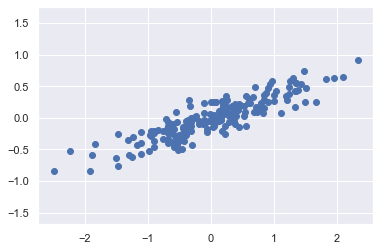

In [9]:
rng = np.random.RandomState(1)
X= np.dot(rng.rand(2,2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

#### In PCA, one quantifies this relationship by finding a list of the principal axes in the data and using those axes to describe the data set. Using Scikit-Learn’s PCA estimator, we can compute this as follows:

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

#### The “fit” learns some quantifiers from the data, most importantly the “components” and “explained variance”.

In [11]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [13]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


#### To see what these numbers mean, let’s visualize them as vectors over the input data using the “component” to define the direction of the vector and the “explained variance” to define the squared-length of the vector.

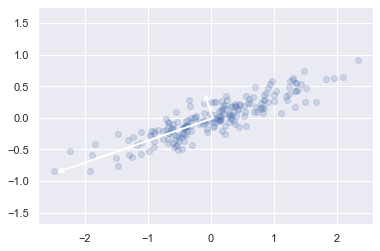

In [20]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict (arrowstyle='->',
                     linewidth=2,
                     shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

### PCA as dimensionality reduction
#### Using PCA for dimensionality reduction involves zeroing out more or more of the smallest principal component, resulting in a lower dimensional projection of the data that preserves the maximal data variance. Here is an example of using PCA as dimensionality reduction transform:

In [22]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:    ", X.shape)
print("transformed shape: ", X_pca.shape)

original shape:     (200, 2)
transformed shape:  (200, 1)


#### The transformed data has been reduced to a single dimension. To understand the effect of the dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data.

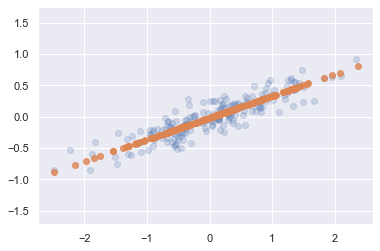

In [24]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

####  How much does the projected data retain the information from the original data?

100% data tetap tersimpan

### Choosing the number of component
#### A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. We can determine this by looking at the cumulative explained variance ratio as a function of the number of component. For this, we use the digit dataset from sklearn. First, we load the dataset:

In [27]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

#### Calculating the cumulative explained variance ratio:

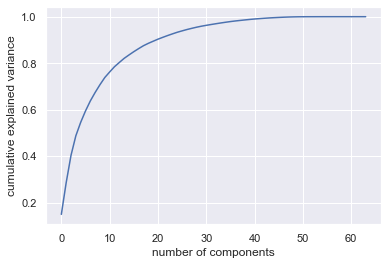

In [29]:
pca = PCA().fit(digits.data)
plt.plot (np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### PCA as Noise Filtering

#### PCA can also be used as a filtering approach for noisy data. The idea is this : any components with variance much larger than the effect of the noise should be relatively unaffected by the noise. So if we reconstruct the data using just the largest subset of principal components, we should be preferentially keeping the signal and throwing out the noise. With using a digit dataset, first we will plot several of the input noise-free data:

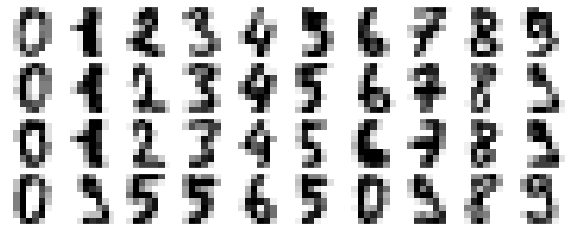

In [30]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks': [], 'yticks' : []},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax. imshow (data [i].reshape (8, 8),
                    cmap='binary', interpolation='nearest',
                    clim=(0, 16))
plot_digits(digits.data)

#### Now let’s add some random noise to create a noisy dataset, and replot it:

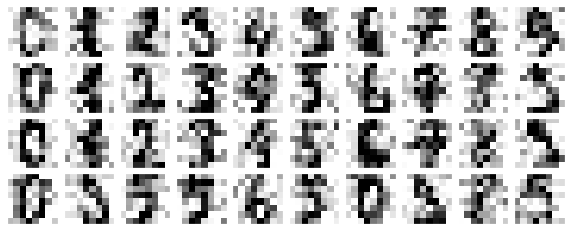

In [32]:
np.random.seed(42)
noisy = np.random. normal(digits.data, 4)
plot_digits(noisy)

#### It’s clear by eye that the images are noisy and contain spurious pixels. Let’s train a PCA on the noisy data, requesting that the projection preserve 50% of the variance:

In [34]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

#### Here 50% of the variance amounts to 12 principal components. Now we can compute these components and then use the inverse of the transform to reconstruct the filtered digits:

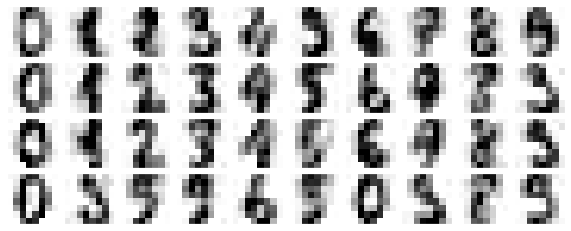

In [35]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

### Hasil Kerja dengan Dataset Sendiri

### Dataset 1: USA_Housing Data

In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler

#### Read Dataset
Selanjutnya kita hanya menggunakan kolom Area Population (satuan ft) dan Price (satuan $)

In [20]:
df = pd.read_csv("USA_Housing.csv", usecols =['Area Population', 'Price'])
df.dropna(inplace=True)
df

,Area Population,Price
0,23086.800503,1.059034e+06
1,40173.072174,1.505891e+06
2,36882.159400,1.058988e+06
3,34310.242831,1.260617e+06
4,26354.109472,6.309435e+05
...,...,...
4995,22837.361035,1.060194e+06
4996,25616.115489,1.482618e+06
4997,33266.145490,1.030730e+06
4998,42625.620156,1.198657e+06


#### Data Normalization using StandardScaler()

In [21]:
std_scaler = StandardScaler()
df = pd.DataFrame(std_scaler.fit_transform(df), columns = ['Area Population', 'Price'])
df

,Area Population,Price
0,-1.317599,-0.490081
1,0.403999,0.775508
2,0.072410,-0.490211
3,-0.186734,0.080843
4,-0.988387,-1.702518
...,...,...
4995,-1.342732,-0.486795
4996,-1.062747,0.709594
4997,-0.291937,-0.570244
4998,0.651116,-0.094640


#### Scatter Plot

(-3.9762944455689126,
 3.7211009526571632,
 -3.7917230445696406,
 3.8507997613639113)

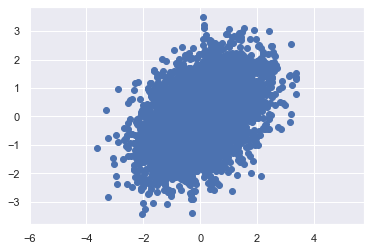

In [22]:
plt.scatter(df['Area Population'], df['Price'])
plt.axis('equal')

#### Describe the dataset with Scikit-Learn's PCA

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df)

PCA(n_components=2)

#### Fit Learns (Components and Explained Variance)

In [24]:
pca.components_

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [25]:
pca.explained_variance_

array([1.40883765, 0.59156243])

#### Explained Variance

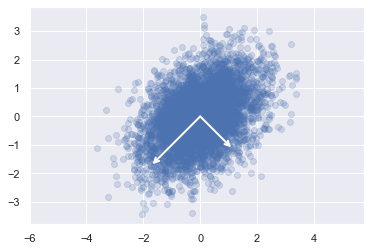

In [30]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                   linewidth=2,
                   shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
# Plot data
plt.scatter(df['Area Population'], df['Price'], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 2 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

#### PCA Dimensionality Reduction

In [17]:
pca = PCA(n_components=1)
pca.fit(df)
df_pca = pca.transform(df)
print("Original shape: ", df.shape)
print("Transformed shape:", df_pca.shape)

Original shape:  (5000, 2)
Transformed shape: (5000, 1)


#### Inverse Transformed Data

(-3.976294445568911,
 3.721100952657163,
 -3.7917230445696406,
 3.8507997613639113)

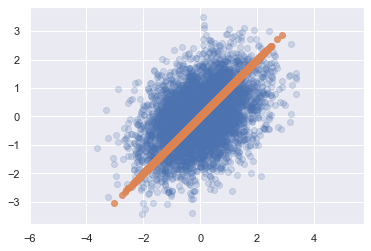

In [18]:
df_new = pca.inverse_transform(df_pca)
plt.scatter(df['Area Population'], df['Price'], alpha=0.2)
plt.scatter(df_new[:, 0], df_new[:, 1], alpha=0.8)
plt.axis('equal')

### Test Sebelum Dataset 2

In [38]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
from sklearn.datasets import load_digits

import pandas as pd
import numpy as np
from PIL import Image 
import random
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

### Hasil Kerja Dataset 2: Animals Image

##### Testing, Importing a single image

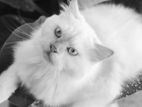

In [2]:
from PIL import Image
img = Image.open("1633804048084_Persian Cat for sale.jpg")
img = img.convert("L")
img

#### Choosing the number of component

In [3]:
import numpy as np
img_data = np.asarray(img)
img_data.shape

(107, 142)

#### Calculating the Cumulative Explained Variance Ratio

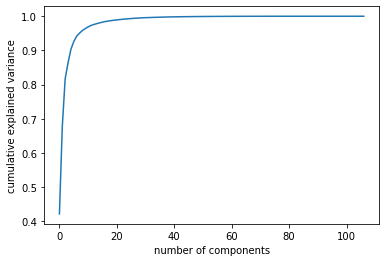

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA().fit(img_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### PCA as Noise Filtering

107 142


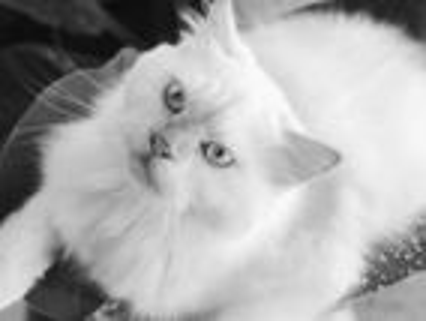

In [5]:
def plot_data(data):
    w, h = data.shape
    print(w, h)
    new_img = Image.fromarray(data)
    new_img = new_img.resize((h*3, w*3))
    new_img = new_img.convert("RGB")
    display(new_img)
plot_data(img_data)

#### Plot several of the input noise-free data

107 142


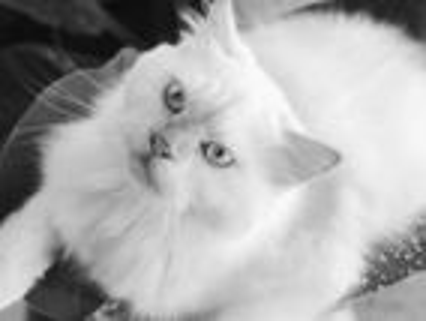

In [6]:
def add_noise(img, x, y):
    new_img = img.copy()
    row, col = new_img.shape
    number_of_pixels = np.random.randint(x, y)
    for i in range(number_of_pixels):
        y_coord=np.random.randint(0, row - 1)
        x_coord=np.random.randint(0, row - 1)
    return new_img

noisy = add_noise(img_data, 300, 800)
plot_data(noisy)

number of components:  2
107 142


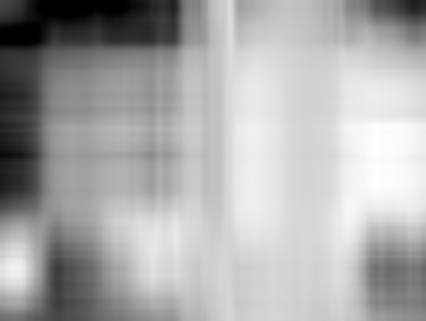

In [7]:
pca = PCA(0.5).fit(noisy)
print("number of components: ", pca.n_components_)

components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_data(filtered)

#### Mengimpor dataset

In [8]:
paths = pd.read_csv('animal_data_img.csv')
paths.head()

,Label,Animal_Type,Image_File
0,indian ringneck,Bird,animal_images/1633802583762_Indian Ringneck fo...
1,rottweiler puppy,Dog,animal_images/1633802583996_Rottweiler Puppy f...
2,rabbit,Rabbit,animal_images/1633802584211_Rabbit for sale.jpg
3,cokatail bird,Bird,animal_images/1633802584412_Cokatail bird for ...
4,apple konda pigeon,Bird,animal_images/1633802584634_Apple Konda Pigeon...


#### Membuat fungsi untuk atribut path file

In [9]:
paths.Image_File = "C:/Users/user/Downloads/" + paths.Image_File

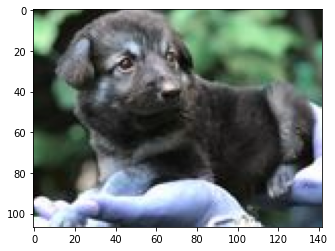

In [10]:
img = cv2.imread(paths.Image_File[69])
plt.imshow(img);

Karena gambar dari dataset belum berhasil untuk diconvert dengan PIL maka gambar tetap memiliki dimensi warna

In [11]:
import numpy as np
img_data = np.asarray(img)
img_data.shape

(107, 142, 3)

### Memproses gambar dengan beragam tekhnik Noisy Images lain

#### Mendefinisikan fungsi SideBySide untuk menampilkan output dua gambar

In [12]:
def SideBySide(image, equalized_image, text1, text2):
    f, (ax1, ax2) = plt.subplots(1,2, figsize= (15,15))

    ax1.imshow(image, cmap='gray')
    ax1.set_title(text1)

    ax2.imshow(equalized_image, cmap='gray')
    ax2.set_title(text2);

#### Salt and Pepper

In [13]:
def SaltPepper(img, num_white, num_black):
    img = img.mean(axis=2).astype('uint8')
    img_noise = np.array(img)
    h , w = img.shape
    number_of_pixels = random.randint(300, num_white)
    for i in range(number_of_pixels):
        y=random.randint(0, h - 1)  
        x=random.randint(0, w - 1)
         
        img_noise[y][x] = 255
         
    number_of_pixels = random.randint(300 , num_black)
    for i in range(number_of_pixels):
        y=random.randint(0, h - 1)
        x=random.randint(0, w - 1)
         
        img_noise[y][x] = 0
    
    SideBySide(img, img_noise, "Original", "Added black and pepper noise");
    return img_noise

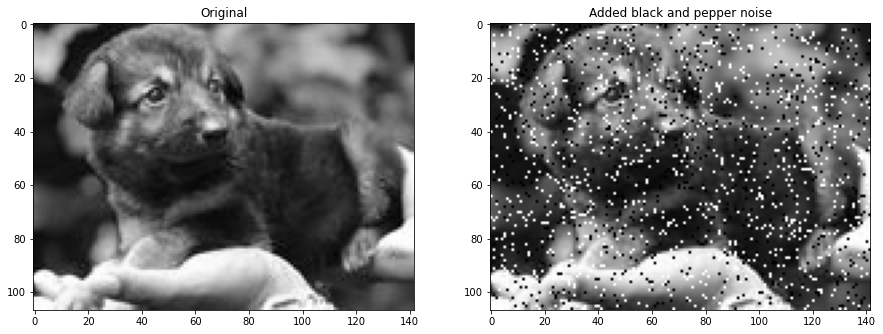

In [21]:
# Menampilkan gambar dengan pixel 10
pix_num = img.shape[0] * img.shape[1]
img_slt_ppr = SaltPepper(img, pix_num//10, pix_num//10)

#### Gaussian Additive

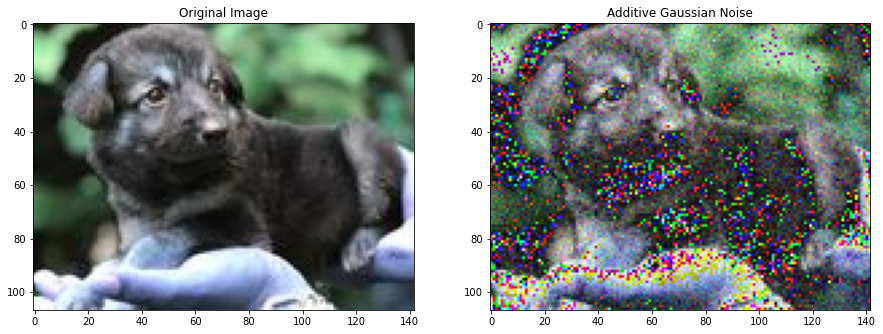

In [15]:
noisy_add = img + np.random.normal(0, 23, size=img.shape)
noisy_add = noisy_add.astype('uint8')

# display image
SideBySide(img, noisy_add, "Original Image", "Additive Gaussian Noise");

#### Filter Avaeraging
Kita dapat melihat kekaburan saat menggunakan filter rata-rata. Itu buruk dalam noisy salt and pepper namun lebih meningkatkan keburaman gambar dengan noisy gaussian

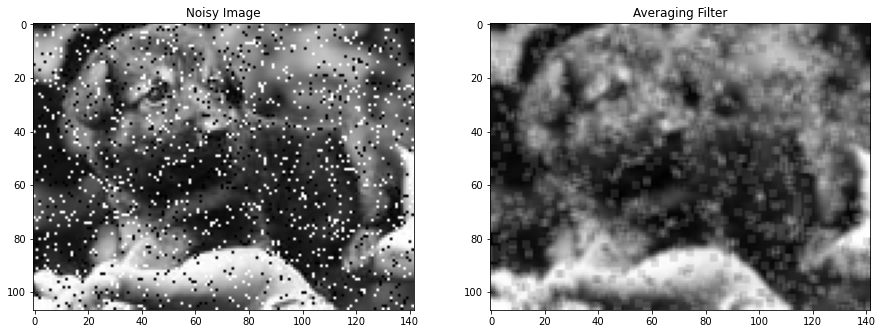

In [22]:
kernel = np.ones((3,3),np.float32)/9
avg_img = cv2.filter2D(img_slt_ppr,-1,kernel)
SideBySide(img_slt_ppr, avg_img, "Noisy Image", "Averaging Filter");

#### Filter Median
Untuk mengurangi tingkat noisy gambar

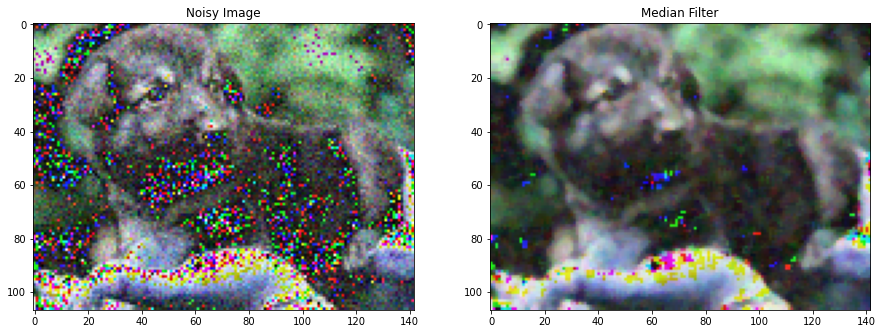

In [17]:
median_img = cv2.medianBlur(noisy_add, 3)
SideBySide(noisy_add, median_img, "Noisy Image", "Median Filter");

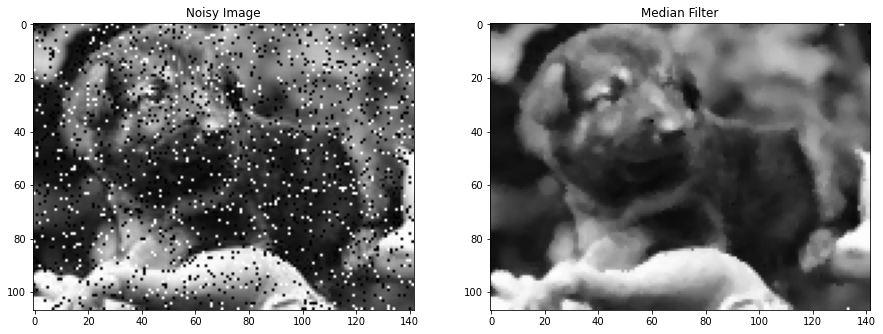

In [18]:
median_img = cv2.medianBlur(img_slt_ppr, 3)
SideBySide(img_slt_ppr, median_img, "Noisy Image", "Median Filter");

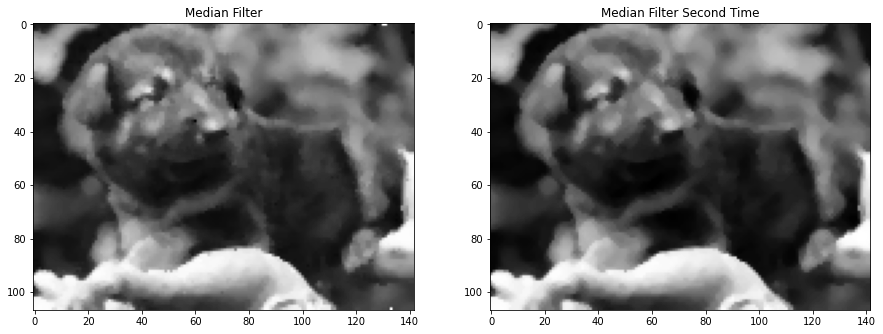

In [19]:
median_img_2 = cv2.medianBlur(median_img, 3)
SideBySide(median_img, median_img_2, "Median Filter", "Median Filter Second Time");

### Kesimpulan

Berdasarkan hasil analisis belajar minggu ke-3, dapat ditarik kesimpulan sebagai berikut: 

- Kedua dataset memiliki perbedaan yaitu Dataset1 yang berisi numerikal dan berfokus pada luas tanah yang dimiliki owner perumahaan per kategori. Sedangkan dataset 2 berisi alamat gambar yang masing-masing gambar diberi label dan kategori.
- Data numerikal atribut luas Area Population dan Harga properti yang membutuhkan proses normalisasi dengan StandardScaler sehingga meningkatkan akurasi penelitian.
- Scatter plot dari persebaran data dapat disederhanakan dengan PCA dimensionality reduction
- Data image yang tersimpan dapat dimanipulasi dengan PCA dan CV2. Pemanipulasian gambar ini dapat dimanfaatkan untuk autentikasi CAPTCHA karena gambar masih cukup jelas di mata manusia, namun tidak dengan AI.

In [134]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t{}".format(myName))
print("NIM: \t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 	Gempar Bambang Godata
NIM: 	00000067643
Time-stamp:	2023-02-27 00:38:55.383664


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [4]:
!jupyter nbconvert --to html "./Template Laporan Tugas Mingguan Lab IF540.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./Template Laporan Tugas Mingguan Lab IF540.ipynb to html
[NbConvertApp] Writing 587760 bytes to Template Laporan Tugas Mingguan Lab IF540.html


### Next step:
* convert the generated html file to PDF using the online tool: https://www.sejda.com/html-to-pdf
* choose the following settings:
    * Page size: One long page
    * Page Orientation: auto
    * Use print stylesheet
* Submit your ipython notebook and PDF files

Markdown basics https://markdown-guide.readthedocs.io/en/latest/basics.html#